# Important Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore") 
sns.set()

#Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
import math
import tensorflow as tf
from tensorflow import keras

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
display(df_train.head(10))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
print(df_train.shape)
print(df_train.columns)
df_train.describe()

(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Analyse Features - Explore the Data

In [4]:
#delete ID Feature
df_train = df_train.drop(["Id"], axis = 1)
df_test = df_test.drop(["Id"], axis = 1)

In [5]:
#Get Numeric and qualitative features
Features_Numeric = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
#Remove Target and ID Column
Features_Qualitative = [f for f in df_train.columns if df_train.dtypes[f] == 'object']
print("Number of quantitative Features:", len(Features_Numeric)-1)#1 for target
print("Number of qualitative Features:", len(Features_Qualitative))

Number of quantitative Features: 36
Number of qualitative Features: 43


In [6]:
# get Feature df
NumericFeatures_df = df_train[Features_Numeric]
QualitativeFeatures_df = df_train[Features_Qualitative]

## Numerical Features - Correlation Matrix

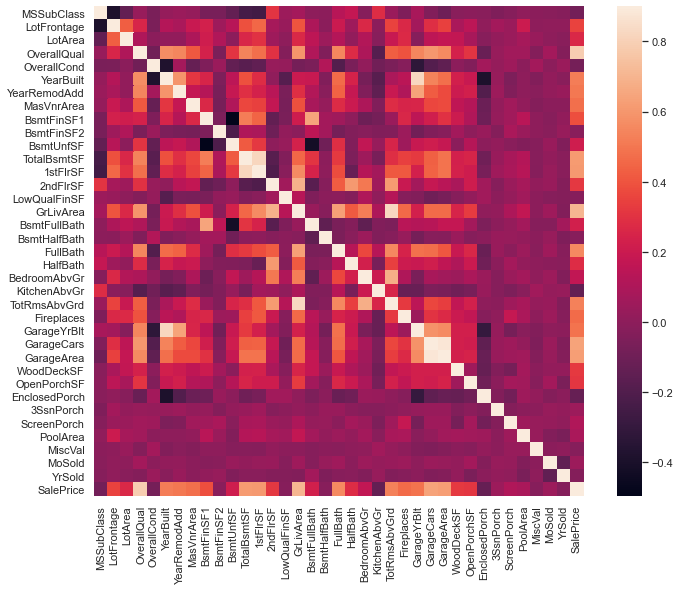

In [7]:
#correlation matrix
CorrelationMatrix = NumericFeatures_df.corr()
#Plot Matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(CorrelationMatrix, vmax=.9, square=True);

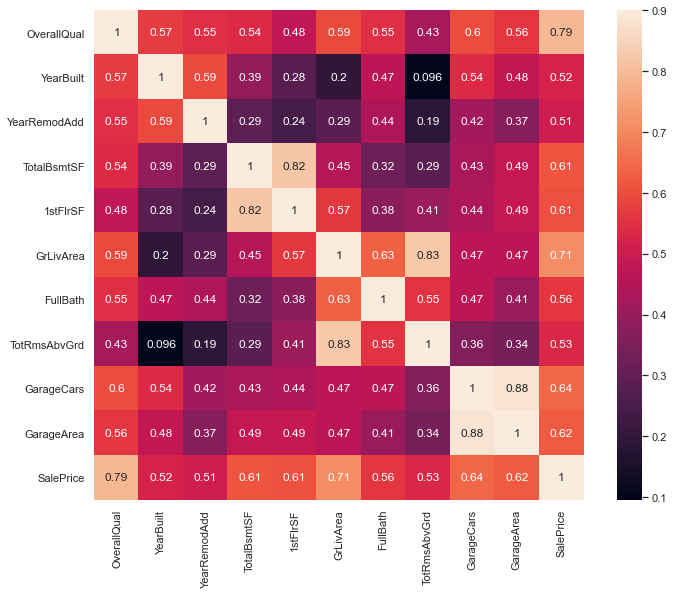

In [8]:
#correlation matrix -> zoom in
CorrelationMatrix = NumericFeatures_df.corr()
#Features with hightest positive correlation (corr > 0.5)
Features_HighestCorrelation_df = CorrelationMatrix.loc[CorrelationMatrix["SalePrice"] > 0.5]
HighCorrelatingFeatureNames = Features_HighestCorrelation_df.index
CorrelationMatrix_HighestCorrelation = Features_HighestCorrelation_df[HighCorrelatingFeatureNames]
#Plot Matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(CorrelationMatrix_HighestCorrelation, vmax=.9, square=True,annot=True);

* Overall Quality and GrLivArea and GarageCars have highest Influence
* Let's evaluate their relation on SalePrice

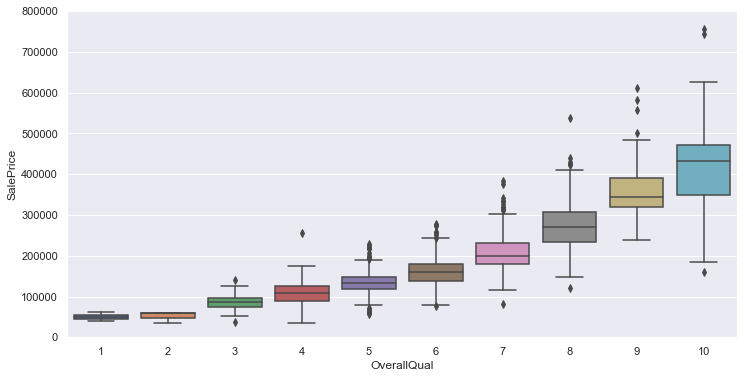

In [9]:
#box plot overallqual/saleprice
Feature = 'OverallQual' # from 1: very poor, to 10: very excellent
data = pd.concat([df_train['SalePrice'], df_train[Feature]], axis=1)
fig, ax = plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x=Feature, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


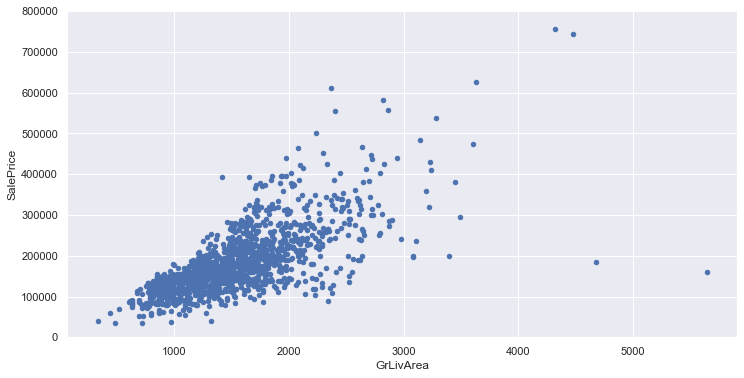

In [10]:
#scatter plot totalbsmtsf/saleprice
Feature = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[Feature]], axis=1)
data.plot.scatter(x=Feature, y='SalePrice', ylim=(0,800000),figsize=(12,6));

* Possible Outlier detected (large living area, but low SalePrice)

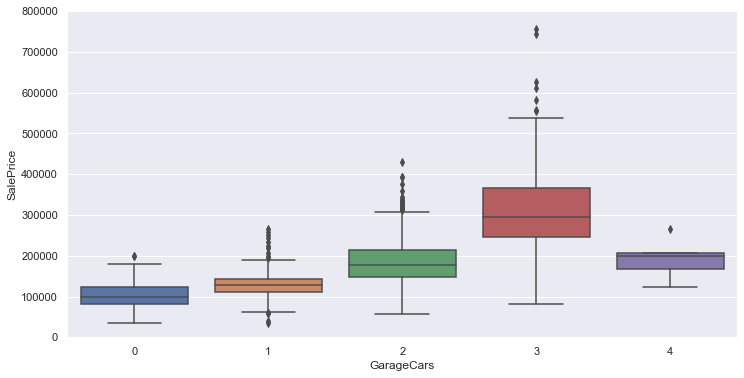

In [11]:
#box plot overallqual/saleprice
Feature = 'GarageCars' # from 1: very poor, to 10: very excellent
data = pd.concat([df_train['SalePrice'], df_train[Feature]], axis=1)
fig, ax = plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x=Feature, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

## Categorical Features - Anova Test

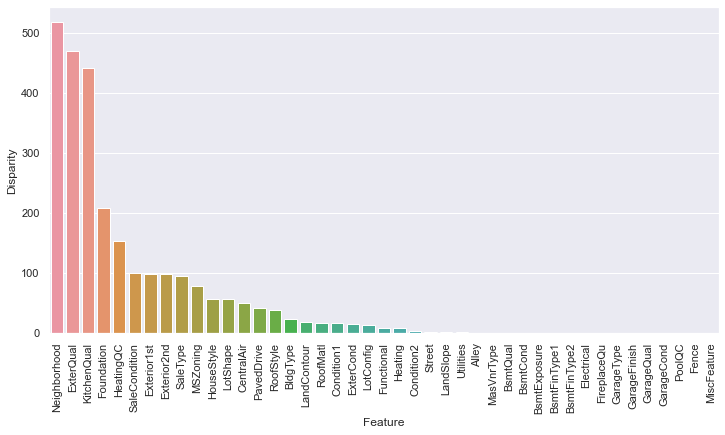

In [12]:
#measure Influence of Categorical variable on Sales Price with ANOVA test
#partion SalePrice for each variable in distinct sets (check differences in distributions)
def anova(frame):
    anv = pd.DataFrame()
    anv['Feature'] = Features_Qualitative
    pvals = []

    for c in Features_Qualitative:
        samples = []
        for cls in frame[c].unique(): #unique values in feature
            s = frame[frame[c] == cls]['SalePrice'].values #get salesprices for category in feature
            samples.append(s)
        pval = stats.f_oneway(*samples)[1] #low p-value points on real difference between distributions
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(df_train)
a['Disparity'] = np.log(1./a['pval'].values)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=a, x='Feature', y='Disparity')
x=plt.xticks(rotation=90)

* Let's visualize the 5 highest ranked features and their influence on SalePrice

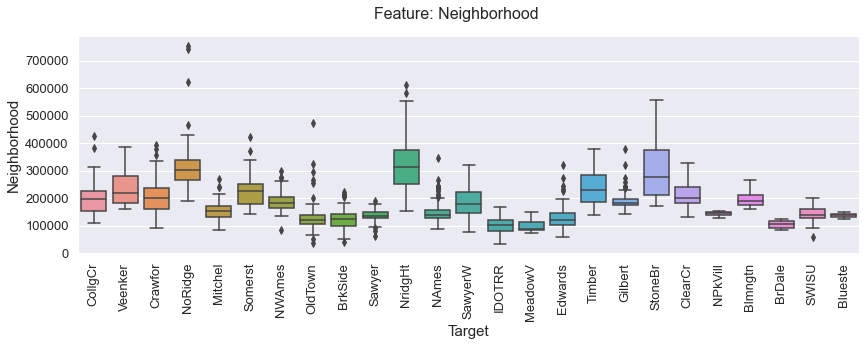

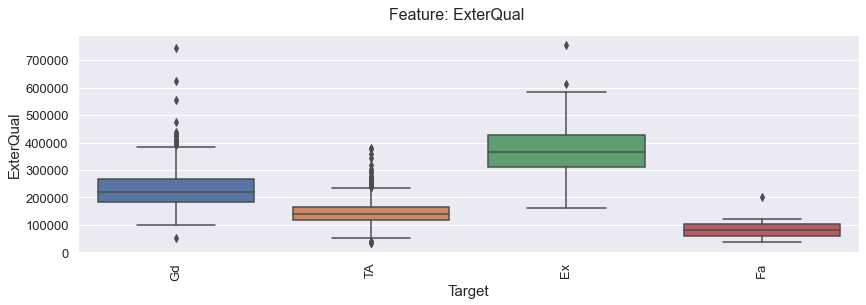

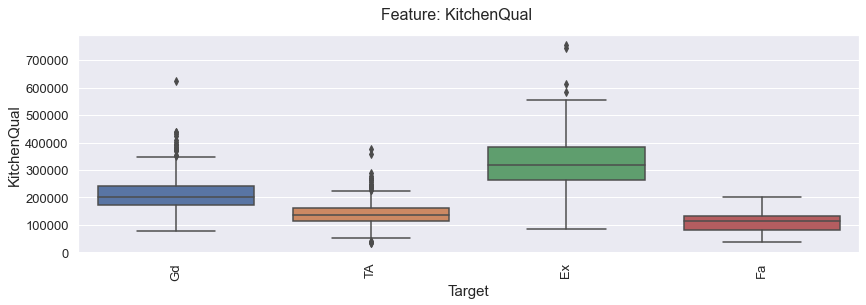

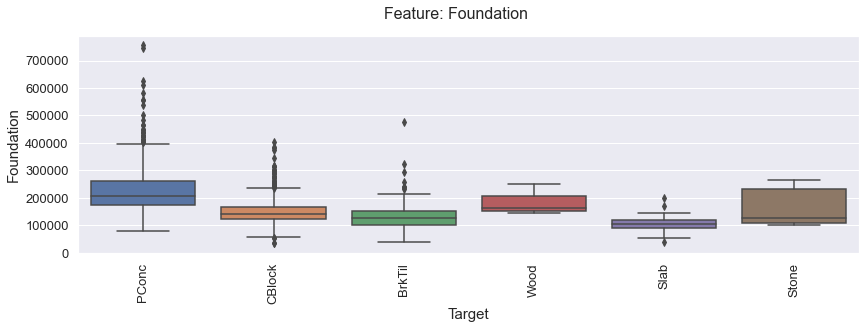

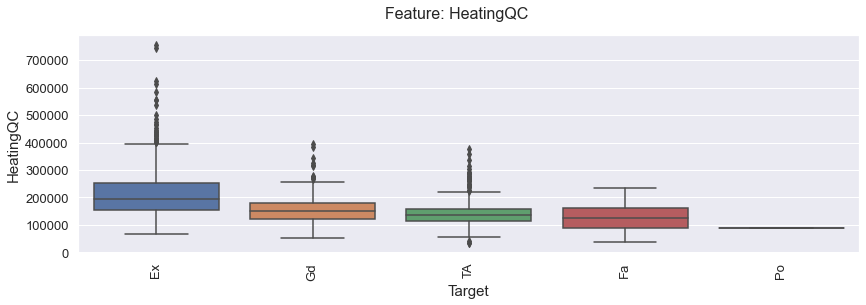

In [13]:
HighestRankeFeature = list(a["Feature"][:5])
Label_Size = 15
Ticks_Size = 13
for i in range(0, len(HighestRankeFeature)):
      title = "Feature: " + HighestRankeFeature[i] 
      plt.figure(figsize=(14,4))
      plt.suptitle(title, fontsize=16)
      ax = sns.boxplot(x=HighestRankeFeature[i] , y="SalePrice", data=df_train)
      #Size of ticks and Labels
      ax.set_xlabel('Target', fontsize = Label_Size)
      ax.set_ylabel( HighestRankeFeature[i], fontsize = Label_Size)
      ax.tick_params(axis='both', labelsize = Ticks_Size)
      plt.xticks(rotation='vertical')
      plt.show()


## Analysing the Target Variable

Skewness: 1.882876
Kurtosis: 6.536282


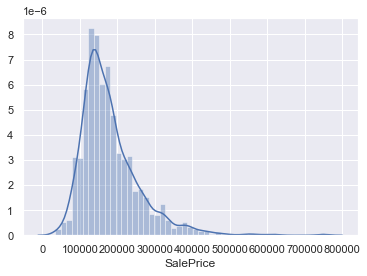

In [14]:
#histogram
y = df_train['SalePrice']
print("Skewness: %f" % y.skew())
print("Kurtosis: %f" % y.kurt())
sns.distplot(df_train['SalePrice']);

* Analyse the underlying distribution of the target variable

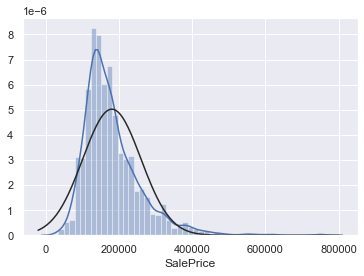

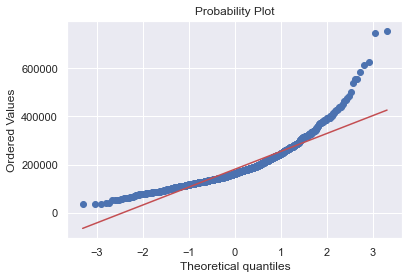

In [15]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

* Diagonal represents the normal distribution -> SalePrice doesn't follow a normal distribution (skewness, kurtosis)
 -> Linear Regression assumes normally distribution
* Apply a log transformation 

In [16]:
y_log = np.log(y)


 mu = 12.02 and sigma = 0.40



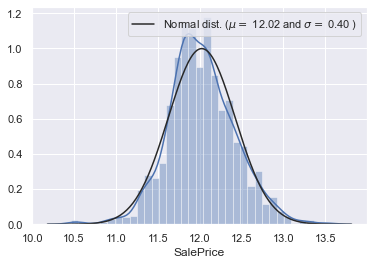

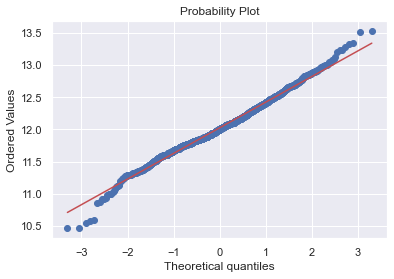

In [17]:
#transformed histogram and normal probability plot
sns.distplot(y_log, fit=stats.norm);
# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(y_log)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
fig = plt.figure()
res = stats.probplot(y_log, plot=plt)

# Tackle Missing Values

* join Datasets -> clean both the test and the train set at the same time

In [18]:
#Create new columns to identify the train and test dataset when it will be requried to split again
df_train['Train']=1
df_test['Train']=0

In [19]:
#Join datasets
df_All_Data = pd.concat([df_train, df_test], axis=0)

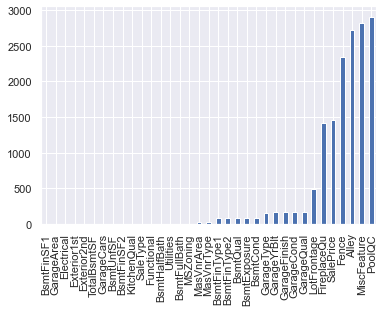

In [20]:
total = df_All_Data.isnull().sum().sort_values(ascending=False)
percent = (df_All_Data.isnull().sum()/df_All_Data.isnull().count()).sort_values(ascending=False)

ColumsWithMissingValues = total[total > 0]
ColumsWithMissingValues.sort_values(inplace=True)
ColumsWithMissingValues.plot.bar()

In [21]:
missing_data_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_df.head(20)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageFinish,159,0.054471
GarageYrBlt,159,0.054471
GarageQual,159,0.054471


* Features with NaN values -> Data cleaning needed
* for PoolQc, Alley, Fence, probabliy because not all Houses have a pool/Alley/Fence

[  0 512 648 576 555 480 519 738 144 368 444 228 561 800]


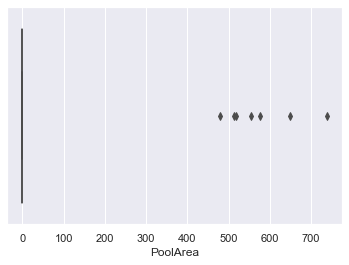

In [22]:
#histogram
print(df_All_Data['PoolArea'].unique())
sns.boxplot(df_train['PoolArea']);

In [23]:
print(df_All_Data['PoolQC'].unique())
print(df_All_Data['Alley'].unique())
print(df_All_Data['Fireplaces'].unique())
print(df_All_Data['FireplaceQu'].unique())
print(df_All_Data['Fence'].unique())

[nan 'Ex' 'Fa' 'Gd']
[nan 'Grvl' 'Pave']
[0 1 2 3 4]
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


In [24]:
#Categorical: ordinal vs nominal (ordinal can be sorted, nominal not)
#Change type of nominal variables -> for dummy creation
df_All_Data['MSSubClass'] = df_All_Data['MSSubClass'].apply(str)
df_All_Data['YrSold'] = df_All_Data['YrSold'].astype(str)
df_All_Data['MoSold'] = df_All_Data['MoSold'].astype(str)

# Feature Imputation

* Impute quantitative/qualitative features with median/mode
* Replace nan with 'None' in PoolArea, Fence, MiscFeature, Alley,FireplaceQu,PoolQC

In [25]:
quantitative = [f for f in df_All_Data.columns if df_All_Data.dtypes[f] != 'object']
qualitative = [f for f in df_All_Data.columns if df_All_Data.dtypes[f] == 'object']

#Fill missing values for quantitative variables
for i in quantitative:
    df_All_Data[i].fillna(df_All_Data[i].median(), inplace = True)
#     print(i, df_All_Data[i].median())

#Fill missing values for special variables
spec_categ_col =['PoolArea', 'Fence', 'MiscFeature', 'Alley','FireplaceQu','PoolQC']
for i in spec_categ_col:
    df_All_Data[i] = df_All_Data[i].fillna('None')
for i in qualitative:
    df_All_Data[i].fillna(df_All_Data[i].mode()[0], inplace = True)
#     print(i, df_All_Data[i].mode())
    

In [26]:
df_All_Data.isnull().sum().sum()

0

In [27]:
print(df_All_Data['PoolQC'].unique())

['None' 'Ex' 'Fa' 'Gd']


In [28]:
#Create dummy variables for categorical columns.
df_All_Data = pd.get_dummies(data=df_All_Data)
df_All_Data.shape


(2919, 325)

# Create DF for Saving the Results

In [33]:
#Dataframe for saving the Results
Colums_Result_df = ['Model','Alpha','Training_RSME_CV_Mean', 'Testing__RSME', 'R2', 'Number_Features','TargetVariableTransformation',
                    'FeatureTransformation', 'FeatureEngineering']
Results_df = pd.DataFrame(columns=Colums_Result_df)

AppliedTransformations = ["None", "None", "None"] #TargetVariableTransformation, FeatureTransformation, FeatureEngineering

Results_df

,Model,Alpha,Training_RSME_CV_Mean,Testing__RSME,R2,Number_Features,TargetVariableTransformation,FeatureTransformation,FeatureEngineering


# Split in Training and Test Set

In [34]:
#Split into training and test dataset from the original data
df_train = df_All_Data[df_All_Data["Train"] ==1]
df_test = df_All_Data[df_All_Data["Train"] ==0]

In [35]:
#Drop the unwanted columns
df_train = df_train.drop(["Train"], axis=1)
df_test = df_test.drop(["Train"], axis=1)
df_test = df_test.drop(["SalePrice"], axis=1)
y = df_train["SalePrice"]
df_train = df_train.drop(["SalePrice"], axis=1)

* Transformation of Target Varible?

In [36]:
def TransformTarget(Transformation, y):
    if Transformation == "log":
        target = np.log(y)
        print("Log Transformation applied")
        AppliedTransformations[0] = "log"
    else:
        print("No Transformation applied")
        AppliedTransformations[0] = "None"
        target = y
    return target
    

In [37]:
Transformation_Target = "None"   #log, None

target = TransformTarget(Transformation_Target,y)

No Transformation applied


In [38]:
X = np.array(df_train)
Feature_Names = df_train.columns

In [39]:
#split the data to train the model 
X_train,X_test,y_train,y_test = train_test_split(X,target,test_size = 0.3,random_state= 42)

print(X_train.shape)

(1022, 323)


* Feature Scaling?

In [40]:
def TransformFeature(Transformation, X_train, X_test):
    if Transformation == "Standardization":
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        AppliedTransformations[1] =Transformation 
        print("Standardization Transformation applied")
    elif Transformation == "MinMax":
        min_max_scaler = MinMaxScaler()
        min_max_scaler.fit(X_train)
        X_train = min_max_scaler.transform(X_train)
        X_test = min_max_scaler.transform(X_test)
        AppliedTransformations[1] = Transformation 
        print("MinMax Transformation applied")
    else:
        print("No Transformation applied")
    return X_train,X_test


In [41]:
Transformation_Feature = "Standardization" #None,MinMax,Standardization

X_train,X_test = TransformFeature(Transformation_Feature, X_train, X_test)
FeatureEngineering = "None"
X_train

Standardization Transformation applied


array([[ 0.43686114, -0.03050433,  0.63603069, ..., -0.13005931,
         0.46080027, -0.30118939],
       [-1.51602025, -0.62436478, -0.82305655, ..., -0.13005931,
         0.46080027, -0.30118939],
       [ 0.08968222, -0.18592357,  0.63603069, ..., -0.13005931,
         0.46080027, -0.30118939],
       ...,
       [-0.43108615, -0.22725096, -0.82305655, ..., -0.13005931,
         0.46080027, -0.30118939],
       [-0.64807297, -0.27405334,  0.63603069, ..., -0.13005931,
         0.46080027, -0.30118939],
       [-0.7348677 , -0.62357003,  0.63603069, ..., -0.13005931,
         0.46080027, -0.30118939]])

# Model Training - Ridge & Lasso Regression

In [42]:
#Function for Cross Validation
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

In [43]:
# Dictionary of classifier types
model_dict = {0: 'Ridge_Regression', 1: 'Lasso_Regression'}

In [44]:
#Hyperparameter Range
alpha_range_Ridge =  [0.1, 0.3, 1, 3,5,10,15,16,20,30,40,50,100,1000,1500,3000
                     ]
alpha_range_Lasso =  [0.0005,0.005,0.05,0.05, 0.1, 0.5,1,1.5,5,10,15,20]
#Cross Validation
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alpha_range_Ridge]
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() 
            for alpha in alpha_range_Lasso]

In [45]:
# List of Results 
Results_Models = [cv_ridge, cv_lasso]
alpha_Models = [alpha_range_Ridge, alpha_range_Lasso]
Results_Alpha_Dfs = []

In [46]:
#create panda df with results
for Res,alphas in zip(Results_Models, alpha_Models):
    data = {'Results': Res,
           'alpha': alphas}
    results_df = pd.DataFrame (data, columns = ['Results','alpha'])
    Results_Alpha_Dfs.append(results_df)

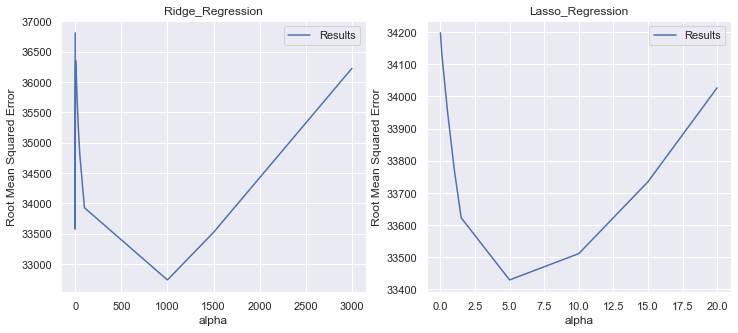

In [47]:
#Plot RSME in dependence of alpha
fig, axs = plt.subplots(1,2, figsize = (12,5))
for i in range(0,len(axs)):
    Results_Alpha_Dfs[i].plot(x = 'alpha', y = 'Results', title = model_dict[i], ax=axs[i])
    axs[i].set(xlabel='alpha', ylabel='Root Mean Squared Error')

In [48]:
Models = []
Model_Lasso = Lasso()
Model_Ridge = Ridge()
Models.append(Model_Ridge)
Models.append(Model_Lasso)

In [50]:
for idx, Res in enumerate(Results_Models):
    Model = model_dict[idx]
    Training_RSME_CV_Mean = Results_Alpha_Dfs[idx]["Results"].min()
    Index = float(Results_Alpha_Dfs[idx][["Results"]].idxmin())
    alpha = Results_Alpha_Dfs[idx]["alpha"][Index]
    #fit best model
    Models[idx].alpha = alpha # choose best hyperparamter alpha
    Models[idx].fit(X_train,y_train)
    R2 = Models[idx].score(X_train,y_train)
    #Evaluate on Test Set
    y_pred = Models[idx].predict(X_test)
    if AppliedTransformations[0] == "log":
        y_pred_log = np.exp(y_pred)
        y_test_log = np.exp(y_test)
        Testing__RSME = math.sqrt(metrics.mean_squared_error(y_pred_log, y_test_log))
    else:
        Testing__RSME = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
    Number_Features = len(Feature_Names)
    
    ColList = [Model, alpha, Training_RSME_CV_Mean,Testing__RSME, R2,Number_Features]
    ColList = ColList + AppliedTransformations
    Df = pd.DataFrame([ColList], columns=Results_df.columns)
    Results_df = Results_df.append(Df, ignore_index=True)
    
Results_df

,Model,Alpha,Training_RSME_CV_Mean,Testing__RSME,R2,Number_Features,TargetVariableTransformation,FeatureTransformation,FeatureEngineering
0,Ridge_Regression,1000.0,32736.357781,30481.266483,0.891541,323,None,Standardization,None
1,Lasso_Regression,5.0,33428.573439,28573.368996,0.939075,323,None,Standardization,None


# Deep Learning Approach

In [110]:
# Set the input and output sizes
input_size = X_train.shape[1]
output_size = 1
# Use same size for all hidden layers
hidden_layer_size = 300

# define how the model will look like
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu',input_shape=[input_size]), #input layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), 
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
        tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='relu') # output layer (relu for continuous target)
])
# Choose the optimizer and the loss function
Opt_Adam= tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)
# Choose the loss function and the metrics 
model.compile(optimizer=Opt_Adam, loss='mse', metrics =["mse","mae",tf.keras.metrics.RootMeanSquaredError()])

# set the batch size
batch_size = 100

# set a maximum number of training epochs
max_epochs = 20

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 300)               97200     
_________________________________________________________________
dense_49 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_50 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_51 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 301       
Total params: 368,401
Trainable params: 368,401
Non-trainable params: 0
_________________________________________________________________


In [111]:
# train (fit) the model
history = model.fit(X_train, # train inputs
          y_train, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for 
          validation_data=(X_test, y_test), # validation data
          verbose = 1 # get information about training process
          )  

Epoch 1/20
11/11 [==============================] - 0s 29ms/step - loss: 38885597184.0000 - mse: 38885597184.0000 - mae: 181292.9688 - root_mean_squared_error: 197194.3125 - val_loss: 39342927872.0000 - val_mse: 39342927872.0000 - val_mae: 179907.1250 - val_root_mean_squared_error: 198350.5156
Epoch 2/20
11/11 [==============================] - 0s 12ms/step - loss: 38744686592.0000 - mse: 38744690688.0000 - mae: 180927.8281 - root_mean_squared_error: 196836.7031 - val_loss: 38860812288.0000 - val_mse: 38860812288.0000 - val_mae: 178748.0312 - val_root_mean_squared_error: 197131.4531
Epoch 3/20
11/11 [==============================] - 0s 11ms/step - loss: 37517275136.0000 - mse: 37517275136.0000 - mae: 178026.5781 - root_mean_squared_error: 193693.7656 - val_loss: 35805503488.0000 - val_mse: 35805507584.0000 - val_mae: 171766.9062 - val_root_mean_squared_error: 189223.4375
Epoch 4/20
11/11 [==============================] - 0s 13ms/step - loss: 31451283456.0000 - mse: 31451283456.0000 -

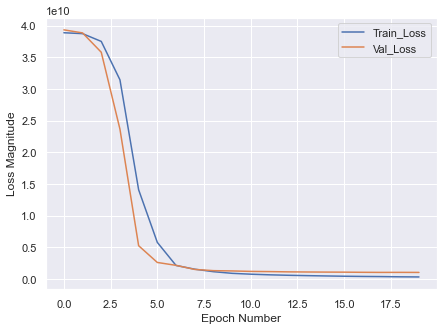

In [112]:
#PLOTTING Train and Validation LOSS 
width = 7
height = 5
plt.figure(figsize=(width, height))
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'], label="Train_Loss")
plt.plot(history.history['val_loss'], label="Val_Loss")
plt.legend()
plt.show()

In [113]:
#evaluate trained model with validation set
model.evaluate(X_test,y_test)

14/14 [==============================] - 0s 3ms/step - loss: 1026449216.0000 - mse: 1026449216.0000 - mae: 21858.8223 - root_mean_squared_error: 32038.2461


[1026449216.0, 1026449216.0, 21858.822265625, 32038.24609375]

In [114]:
#predict test, train targets with model
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

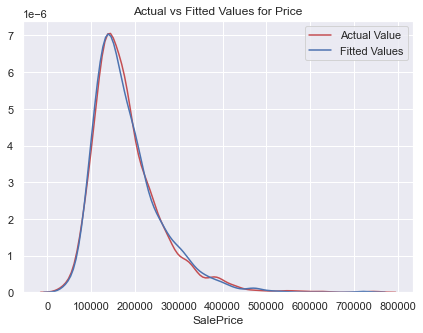

In [115]:
# Distribution Train set: Compare actual and predicted target values
plt.figure(figsize=(width, height))
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_train, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')

plt.show()
plt.close()



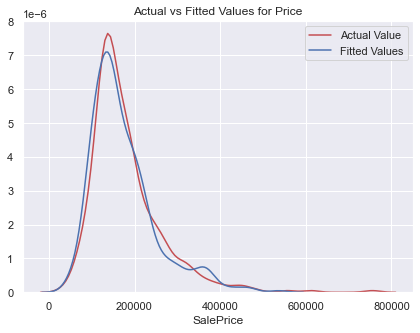

In [116]:
# Distribution Test set: Compare actual and predicted target values
plt.figure(figsize=(width, height))
ax2 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_test, hist=False, color="b", label="Fitted Values" , ax=ax2)

plt.title('Actual vs Fitted Values for Price')
plt.show()
plt.close()